In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
pd.set_option('display.max_columns', None) # used to display all the columns
df=pd.read_excel('Telco_customer_churn.xlsx')

In [31]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [32]:
df.shape

(7043, 33)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [34]:
# Drop customerid,country,state,churn label,zip code,Lat long, Latitude, longitude
df.drop(columns=['CustomerID','Country','State','Zip Code','Lat Long','Latitude','Longitude'], inplace=True)

In [35]:
df.loc[df['Tenure Months'] == 0, 'Total Charges'] = 0
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [36]:
df.isnull().sum()

Count                   0
City                    0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

### Churn dustribution

In [37]:
churn_counts = df['Churn Value'].value_counts(normalize=True) * 100
churn_counts

Churn Value
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [38]:
# 26.53 percent customers have churned

### 1. Churn by contract type

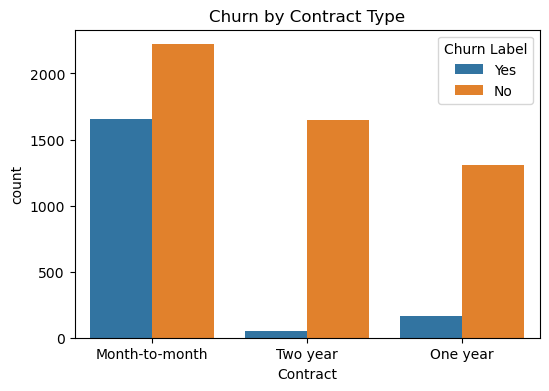

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title("Churn by Contract Type")
plt.show()

### 2. Churn vs Tenure

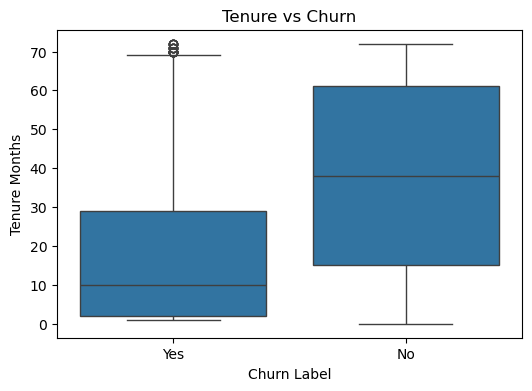

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn Label', y='Tenure Months', data=df)
plt.title("Tenure vs Churn")
plt.show()

### 3. Monthly Charges vs Churn

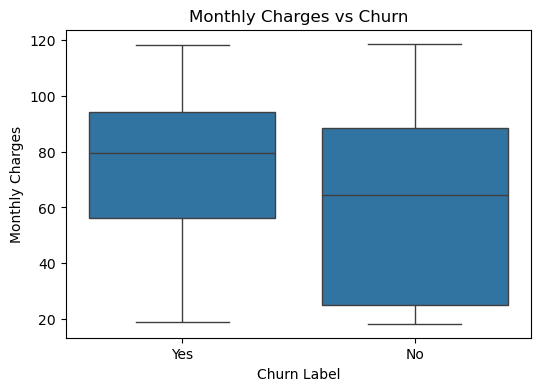

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

### 4. Internet Service vs Churn

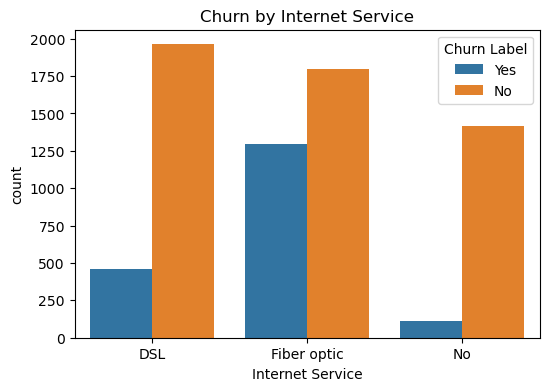

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x='Internet Service', hue='Churn Label', data=df)
plt.title("Churn by Internet Service")
plt.show()

In [43]:
df['Tenure Months'].value_counts()

Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

## Feature Engineering

In [44]:
df['Tenure_Group'] = pd.cut(
    df['Tenure Months'],
    bins=[-1, 12, 24, 48, 72],
    labels=['0-1 Year', '1-2 Years', '2-4 Years', '4+ Years']
)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Count              7043 non-null   int64   
 1   City               7043 non-null   object  
 2   Gender             7043 non-null   object  
 3   Senior Citizen     7043 non-null   object  
 4   Partner            7043 non-null   object  
 5   Dependents         7043 non-null   object  
 6   Tenure Months      7043 non-null   int64   
 7   Phone Service      7043 non-null   object  
 8   Multiple Lines     7043 non-null   object  
 9   Internet Service   7043 non-null   object  
 10  Online Security    7043 non-null   object  
 11  Online Backup      7043 non-null   object  
 12  Device Protection  7043 non-null   object  
 13  Tech Support       7043 non-null   object  
 14  Streaming TV       7043 non-null   object  
 15  Streaming Movies   7043 non-null   object  
 16  Contra

In [46]:
df.columns

Index(['Count', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Tenure_Group'],
      dtype='object')

In [47]:
# More services → more dependency → less churn
service_cols = [
    'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies'
]

df['Total_Services'] = df[service_cols].apply(
    lambda row: (row == 'Yes').sum(), axis=1
)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Count              7043 non-null   int64   
 1   City               7043 non-null   object  
 2   Gender             7043 non-null   object  
 3   Senior Citizen     7043 non-null   object  
 4   Partner            7043 non-null   object  
 5   Dependents         7043 non-null   object  
 6   Tenure Months      7043 non-null   int64   
 7   Phone Service      7043 non-null   object  
 8   Multiple Lines     7043 non-null   object  
 9   Internet Service   7043 non-null   object  
 10  Online Security    7043 non-null   object  
 11  Online Backup      7043 non-null   object  
 12  Device Protection  7043 non-null   object  
 13  Tech Support       7043 non-null   object  
 14  Streaming TV       7043 non-null   object  
 15  Streaming Movies   7043 non-null   object  
 16  Contra

In [49]:
df['Has_Internet'] = df['Internet Service'].apply(
    lambda x: 0 if x == 'No' else 1
)

In [50]:
# High monthly charge indicator , Price sensitivity drives churn
median_charge = df['Monthly Charges'].median()
df['High_Monthly_Charge'] = (df['Monthly Charges'] > median_charge).astype(int)

In [51]:
# Manual payments → higher churn
df['Auto_Payment'] = df['Payment Method'].apply(
    lambda x: 1 if x in [
        'Bank transfer (automatic)', 
        'Credit card (automatic)'
    ] else 0
)

In [52]:
# Contract lock-in reduces churn

df['Long_Term_Contract'] = df['Contract'].apply(
    lambda x: 1 if x in ['One year', 'Two year'] else 0
)

## Preparing dataset for ML

In [53]:
df_model = df.drop(columns=['Churn Label'])

In [54]:
drop_cols = [
    'City',
    'Churn Reason',
    'Count'
]

df_model = df.drop(columns=drop_cols)

In [55]:
df_model.to_csv('telco_modified.csv')

### Separate target variables

In [56]:
y = df['Churn Value']
X = df.drop('Churn Value', axis=1)

In [57]:
X.dtypes

Count                     int64
City                     object
Gender                   object
Senior Citizen           object
Partner                  object
Dependents               object
Tenure Months             int64
Phone Service            object
Multiple Lines           object
Internet Service         object
Online Security          object
Online Backup            object
Device Protection        object
Tech Support             object
Streaming TV             object
Streaming Movies         object
Contract                 object
Paperless Billing        object
Payment Method           object
Monthly Charges         float64
Total Charges           float64
Churn Label              object
Churn Score               int64
CLTV                      int64
Churn Reason             object
Tenure_Group           category
Total_Services            int64
Has_Internet              int64
High_Monthly_Charge       int64
Auto_Payment              int64
Long_Term_Contract        int64
dtype: o

In [58]:
cat_cols = X.select_dtypes(include=['object','category']).columns

# One hot encoding the categorical columns

X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [59]:
# create dummy variables for tenure group column

df_encoded = pd.get_dummies(
    df_model,
    columns=['Tenure_Group'],
    drop_first=True
)

# X → all input features (what the model learns from)
# y → output label (what the model predicts)

In [60]:
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [61]:
X.dtypes

Count                                     int64
Tenure Months                             int64
Monthly Charges                         float64
Total Charges                           float64
Churn Score                               int64
                                         ...   
Churn Reason_Product dissatisfaction      int64
Churn Reason_Service dissatisfaction      int64
Tenure_Group_1-2 Years                    int64
Tenure_Group_2-4 Years                    int64
Tenure_Group_4+ Years                     int64
Length: 1189, dtype: object

## Machine learning

### 1. Train and test split

In [62]:
# stratify Keeps churn/non-churn ratio same in train & test → real-world behavior

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [63]:
X.dtypes

Count                                     int64
Tenure Months                             int64
Monthly Charges                         float64
Total Charges                           float64
Churn Score                               int64
                                         ...   
Churn Reason_Product dissatisfaction      int64
Churn Reason_Service dissatisfaction      int64
Tenure_Group_1-2 Years                    int64
Tenure_Group_2-4 Years                    int64
Tenure_Group_4+ Years                     int64
Length: 1189, dtype: object

### 2. Random forest model

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'   # handles churn imbalance
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

### 3. XGBoost Model

In [65]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

### 4. Model evaluation function

In [66]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    }

### 5. Compare results

In [67]:
rf_results = evaluate_model(rf_model, X_test, y_test)
xgb_results = evaluate_model(xgb_model, X_test, y_test)

import pandas as pd

results_df = pd.DataFrame([rf_results, xgb_results],
                          index=['Random Forest', 'XGBoost'])

results_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.969336,0.907298,0.985011,0.944559,0.998117
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000


### 6. Feature Importance

#### (i) Random Forest Model

In [68]:
rf_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

rf_importance.head(10)

Churn Label_Yes                    0.247806
Churn Score                        0.151767
Long_Term_Contract                 0.058899
Tenure Months                      0.039717
Internet Service_Fiber optic       0.028982
Contract_Two year                  0.027019
Total Charges                      0.024589
Payment Method_Electronic check    0.023803
Tenure_Group_4+ Years              0.020567
Dependents_Yes                     0.020052
dtype: float64

#### (ii) XGBoost

In [69]:
xgb_importance = pd.Series(
    xgb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

xgb_importance.head(10)

Churn Label_Yes                                           0.496346
Churn Score                                               0.117252
Long_Term_Contract                                        0.096497
Churn Reason_Competitor made better offer                 0.059670
Churn Reason_Competitor offered higher download speeds    0.028323
Churn Reason_Competitor offered more data                 0.021675
Internet Service_Fiber optic                              0.019069
Churn Reason_Attitude of support person                   0.018690
Churn Reason_Don't know                                   0.014419
Churn Reason_Price too high                               0.013400
dtype: float32

## Choosing a better model between the models

### 1. Confusion matrix (Random Forest)

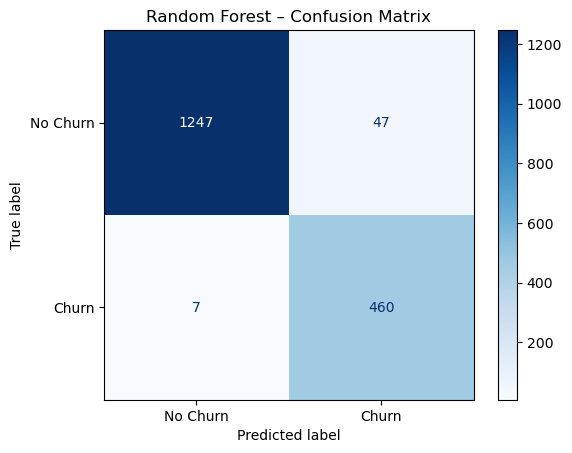

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_cm = confusion_matrix(y_test, rf_model.predict(X_test))

ConfusionMatrixDisplay(
    confusion_matrix=rf_cm,
    display_labels=['No Churn', 'Churn']
).plot(cmap='Blues')

plt.title("Random Forest – Confusion Matrix")
plt.show()

### 2. Confusion matrix (XGBoost)

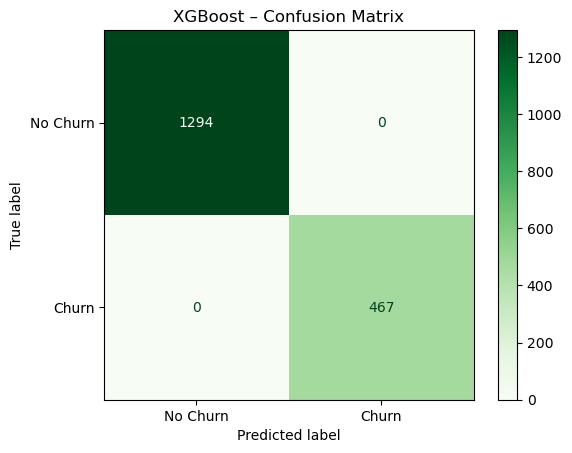

In [71]:
xgb_cm = confusion_matrix(y_test, xgb_model.predict(X_test))

ConfusionMatrixDisplay(
    confusion_matrix=xgb_cm,
    display_labels=['No Churn', 'Churn']
).plot(cmap='Greens')

plt.title("XGBoost – Confusion Matrix")
plt.show()

### 3. Classification report

In [72]:
from sklearn.metrics import classification_report

print("Random Forest Report")
print(classification_report(y_test, rf_model.predict(X_test)))

print("\nXGBoost Report")
print(classification_report(y_test, xgb_model.predict(X_test)))

Random Forest Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1294
           1       0.91      0.99      0.94       467

    accuracy                           0.97      1761
   macro avg       0.95      0.97      0.96      1761
weighted avg       0.97      0.97      0.97      1761


XGBoost Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1294
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761



### 4. ROC curve

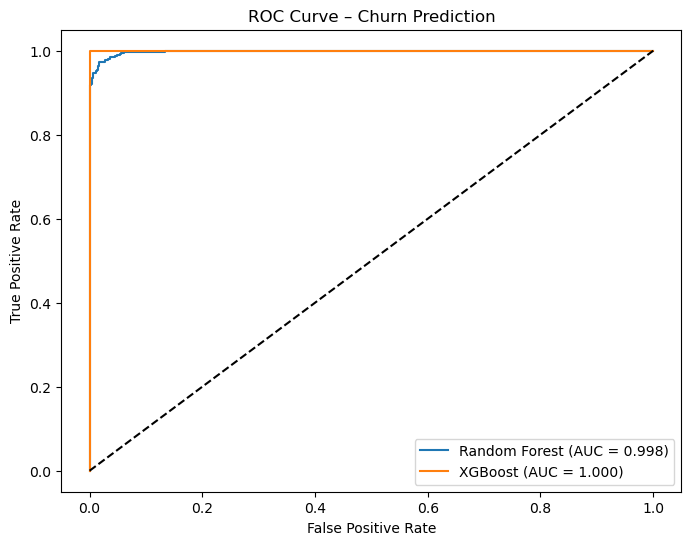

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.3f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, xgb_probs):.3f})")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Churn Prediction")
plt.legend()
plt.show()

XGBoost achieved a higher ROC-AUC and recall compared to Random Forest, making it more effective at identifying customers likely to churn.Since missing a churner is costlier than targeting a loyal customer, 
XGBoost was selected as the final model.

## Saving the final model selected

### Saving the model

In [74]:
import joblib

joblib.dump(xgb_model, "xgboost_churn_model.pkl")

['xgboost_churn_model.pkl']

### Saving the feature list

In [75]:
joblib.dump(X.columns.tolist(), "model_features.pkl")

['model_features.pkl']

## Checking the model

In [76]:
loaded_model = joblib.load("xgboost_churn_model.pkl")

loaded_model.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [77]:
churn_prob = loaded_model.predict_proba(X_test)[:, 1]

churn_results = X_test.copy()
churn_results['Churn_Probability'] = churn_prob
churn_results['Predicted_Churn'] = (churn_prob >= 0.5).astype(int)

churn_results.head()

,Count,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Total_Services,Has_Internet,High_Monthly_Charge,Auto_Payment,Long_Term_Contract,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,City_Antelope,City_Antioch,City_Anza,City_Apple Valley,City_Applegate,City_Aptos,City_Arbuckle,City_Arcadia,City_Arcata,City_Armona,City_Arnold,City_Aromas,City_Arroyo Grande,City_Artesia,City_Arvin,City_Atascadero,City_Atherton,City_Atwater,City_Auberry,City_Auburn,City_Avalon,City_Avenal,City_Avery,City_Avila Beach,City_Azusa,City_Badger,City_Baker,City_Bakersfield,City_Baldwin Park,City_Ballico,City_Bangor,City_Banning,City_Barstow,City_Bass Lake,City_Bayside,City_Beale Afb,City_Beaumont,City_Bell,City_Bella Vista,City_Bellflower,City_Belmont,City_Belvedere Tiburon,City_Ben Lomond,City_Benicia,City_Benton,City_Berkeley,City_Berry Creek,City_Bethel Island,City_Beverly Hills,City_Bieber,City_Big Bar,City_Big Bear City,City_Big Bear Lake,City_Big Bend,City_Big Creek,City_Big Oak Flat,City_Big Pine,City_Big Sur,City_Biggs,City_Biola,City_Birds Landing,City_Bishop,City_Blairsden Graeagle,City_Blocksburg,City_Bloomington,City_Blue Lake,City_Blythe,City_Bodega,City_Bodega Bay,City_Bodfish,City_Bolinas,City_Bonita,City_Bonsall,City_Boonville,City_Boron,City_Borrego Springs,City_Boulder Creek,City_Boulevard,City_Bradley,City_Branscomb,City_Brawley,City_Brea,City_Brentwood,City_Bridgeport,City_Bridgeville,City_Brisbane,City_Brookdale,City_Brooks,City_Browns Valley,City_Brownsville,City_Buellton,City_Buena Park,City_Burbank,City_Burlingame,City_Burney,City_Burnt Ranch,City_Burson,City_Butte City,City_Buttonwillow,City_Byron,City_Cabazon,City_Calabasas,City_Calexico,City_Caliente,City_California City,City_California Hot Springs,City_Calimesa,City_Calipatria,City_Calistoga,City_Callahan,City_Calpine,City_Camarillo,City_Cambria,City_Camino,City_Camp Nelson,City_Campbell,City_Campo,City_Campo Seco,City_Camptonville,City_Canby,City_Canoga Park,City_Cantua Creek,City_Canyon Country,City_Canyon Dam,City_Capay,City_Capistrano Beach,City_Capitola,City_Cardiff By The Sea,City_Carlotta,City_Carlsbad,City_Carmel,City_Carmel By The Sea,City_Carmel Valley,City_Carmichael,City_Carnelian Bay,City_Carpinteria,City_Carson,City_Caruthers,City_Casmalia,City_Caspar,City_Cassel,City_Castaic,City_Castella,City_Castro Valley,City_Castroville,City_Cathedral City,City_Catheys Valley,City_Cayucos,City_Cazadero,City_Cedar Glen,City_Cedarville,City_Ceres,City_Cerritos,City_Challenge,City_Chatsworth,City_Chester,City_Chico,City_Chilcoot,City_Chino,City_Chino Hills,City_Chowchilla,City_Chualar,City_Chula Vista,City_Citrus Heights,City_Claremont,City_Clarksburg,City_Clayton,City_Clearlake,City_Clearlake Oaks,City_Clements,City_Clio,City_Clipper Mills,City_Cloverdale,City_Clovis,City_Coachella,City_Coalinga,City_Coarsegold,City_Cobb,City_Coleville,City_Colfax,City_Colton,City_Columbia,City_Colusa,City_Comptche,City_Compton,City_Concord,City_Cool,City_Copperopolis,City_Corcoran,City_Corning,City_Corona,City_Corona Del Mar,City_Coronado,City_Corte Madera,City_Costa Mesa,City_Cotati,City_Cottonwood,City_Coulterville,City_Courtland,City_Covelo,City_Covina,City_Crescent City,City_Crescent Mills,City_Cressey,City_Crestline,City_Creston,City_Crockett,City_Crows Landing,City_Culver City,City_Cupertino,City_Cutler,City_Cypress,City_Daggett,City_Daly City,City_Dana Point,City_Danville,City_Darwin,City_Davenport,City_Davis,City_Davis Creek,City_Death Valley,City_Deer Park,City_Del Mar,City_Del Rey,City_Delano,City_Delhi,City_Denair,City_Descanso,City_Desert Center,City_Desert Hot Springs,City_Diamond Bar,City_Diamond Springs,City_Dillon Beach,City_Dinuba,City

In [78]:
# Lowering the threshold increases the recall, ensuring fewer churners are missed
churn_results['Predicted_Churn_40pct'] = (churn_prob >= 0.4).astype(int)

# SQL analysis

In [79]:
!pip install mysql-connector-python sqlalchemy

   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.5 MB 7.2 MB/s eta 0:00:03
   -------- ------------------------------- 3.4/16.5 MB 9.8 MB/s eta 0:00:02
   -------------- ------------------------- 6.0/16.5 MB 10.7 MB/s eta 0:00:01
   ---------------------- ----------------- 9.2/16.5 MB 11.8 MB/s eta 0:00:01
   ----------------------------- ---------- 12.1/16.5 MB 12.4 MB/s eta 0:00:01
   -------------------------------------- - 16.0/16.5 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 16.5/16.5 MB 12.8 MB/s eta 0:00:00


### 1. Connecting MYSQL

In [85]:
from sqlalchemy import create_engine
import pandas as pd
from urllib.parse import quote_plus

username = "root"
password = quote_plus("Roshan@12")
host = "localhost"
database = "customer_churn"

engine = create_engine(
    f"mysql+mysqlconnector://{username}:{password}@{host}/{database}"
)

print("Connected successfully!")


Connected successfully!


### 2. Load SQL table into pandas

In [86]:
query = "SELECT * FROM telco_modified"

df_sql = pd.read_sql(query, engine)

df_sql.head()

,MyUnknownColumn,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Tenure_Group,Total_Services,Has_Internet,High_Monthly_Charge,Auto_Payment,Long_Term_Contract
0,0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,0-1 Year,3,1,0,0,0
1,1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,0-1 Year,1,1,1,0,0
2,2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,0-1 Year,5,1,1,0,0
3,3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,2-4 Years,6,1,1,0,0
4,4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,4+ Years,6,1,1,1,0


### 3. SQL analysis using sql queries

#### (i) Overall churn rate

In [91]:
query = """
SELECT ROUND(AVG(Churn_Value) * 100, 2) AS churn_rate FROM telco_modified;
"""
pd.read_sql(query, engine)

,churn_rate
0,26.54


#### (ii) Churn by contract

In [93]:
query = """
SELECT
    Contract,
    COUNT(*) AS total_customers,
    ROUND(AVG(Churn_Value)*100,2) AS churn_rate
FROM telco_modified
GROUP BY Contract
ORDER BY churn_rate DESC;
"""

pd.read_sql(query, engine)

,Contract,total_customers,churn_rate
0,Month-to-month,3875,42.71
1,One year,1473,11.27
2,Two year,1695,2.83


#### (iii) Churn by tenure

In [94]:
query = """
SELECT
    Tenure_Group,
    ROUND(AVG(Churn_Value)*100,2) AS churn_rate
FROM telco_modified
GROUP BY Tenure_Group;
"""

pd.read_sql(query, engine)

,Tenure_Group,churn_rate
0,0-1 Year,47.44
1,2-4 Years,20.39
2,4+ Years,9.51
3,1-2 Years,28.71


#### (iv) Revenue at risk

In [96]:
query = """
SELECT
    ROUND(SUM(Monthly_Charges),2) AS revenue_at_risk
FROM telco_modified
WHERE Churn_Value = 1;
"""
pd.read_sql(query, engine)


,revenue_at_risk
0,139107.0


#### (v) High-Risk Customers 

In [97]:
query = """
SELECT COUNT(*) AS high_risk_customers
FROM telco_modified
WHERE Churn_Value = 1
  AND Monthly_Charges > 80
  AND Tenure_Months < 12;
"""
pd.read_sql(query, engine)


,high_risk_customers
0,299
